In [131]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [132]:
import io
import fitz
import re
from PIL import Image, ImageDraw, ImageFont, ImageColor
import operator
import os
import pandas as pd 
import numpy as np
from datetime import datetime
import math
from tqdm import tqdm

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

import io
import fitz
import re
from PIL import Image, ImageDraw, ImageFont, ImageColor
import operator
import os
import pandas as pd 
import numpy as np
from datetime import datetime
import math
from tqdm import tqdm
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [133]:
"""INDEX 1"""
parent = "../" 
pdf_dir = parent + "input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 1.pdf"
doc = fitz.open(pdf_dir)
pages = [doc[i] for i in range(doc.page_count)]
index = range(616, 639)
"""INDEX 1"""

TARGET_DPI = 300
mat = fitz.Matrix(TARGET_DPI/ 72, TARGET_DPI/ 72)

indent_groups = []
indent_err = 15

In [146]:
myFont = ImageFont.truetype("Arial", 15)

page_num = index[0]
block_lst = pages[page_num].get_text("dict")['blocks']

pix_map = doc.get_page_pixmap(index[0],matrix=mat)
image = Image.open(io.BytesIO(pix_map.tobytes()))
draw = ImageDraw.Draw(image)

line_x = []
for b in block_lst:
    if b['type'] == 0:
        for l in b['lines']:
            x0 = l['bbox'][0]*(TARGET_DPI/ 72)
            if x0 < 500:
                line_x0 = x0
                line_x.append(line_x0)
line_x = np.array(line_x).reshape(-1, 1)

In [147]:
#bandwidth = estimate_bandwidth(line_x, quantile=0.2, n_samples=500)

ms = MeanShift(bin_seeding=True)
ms.fit(line_x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


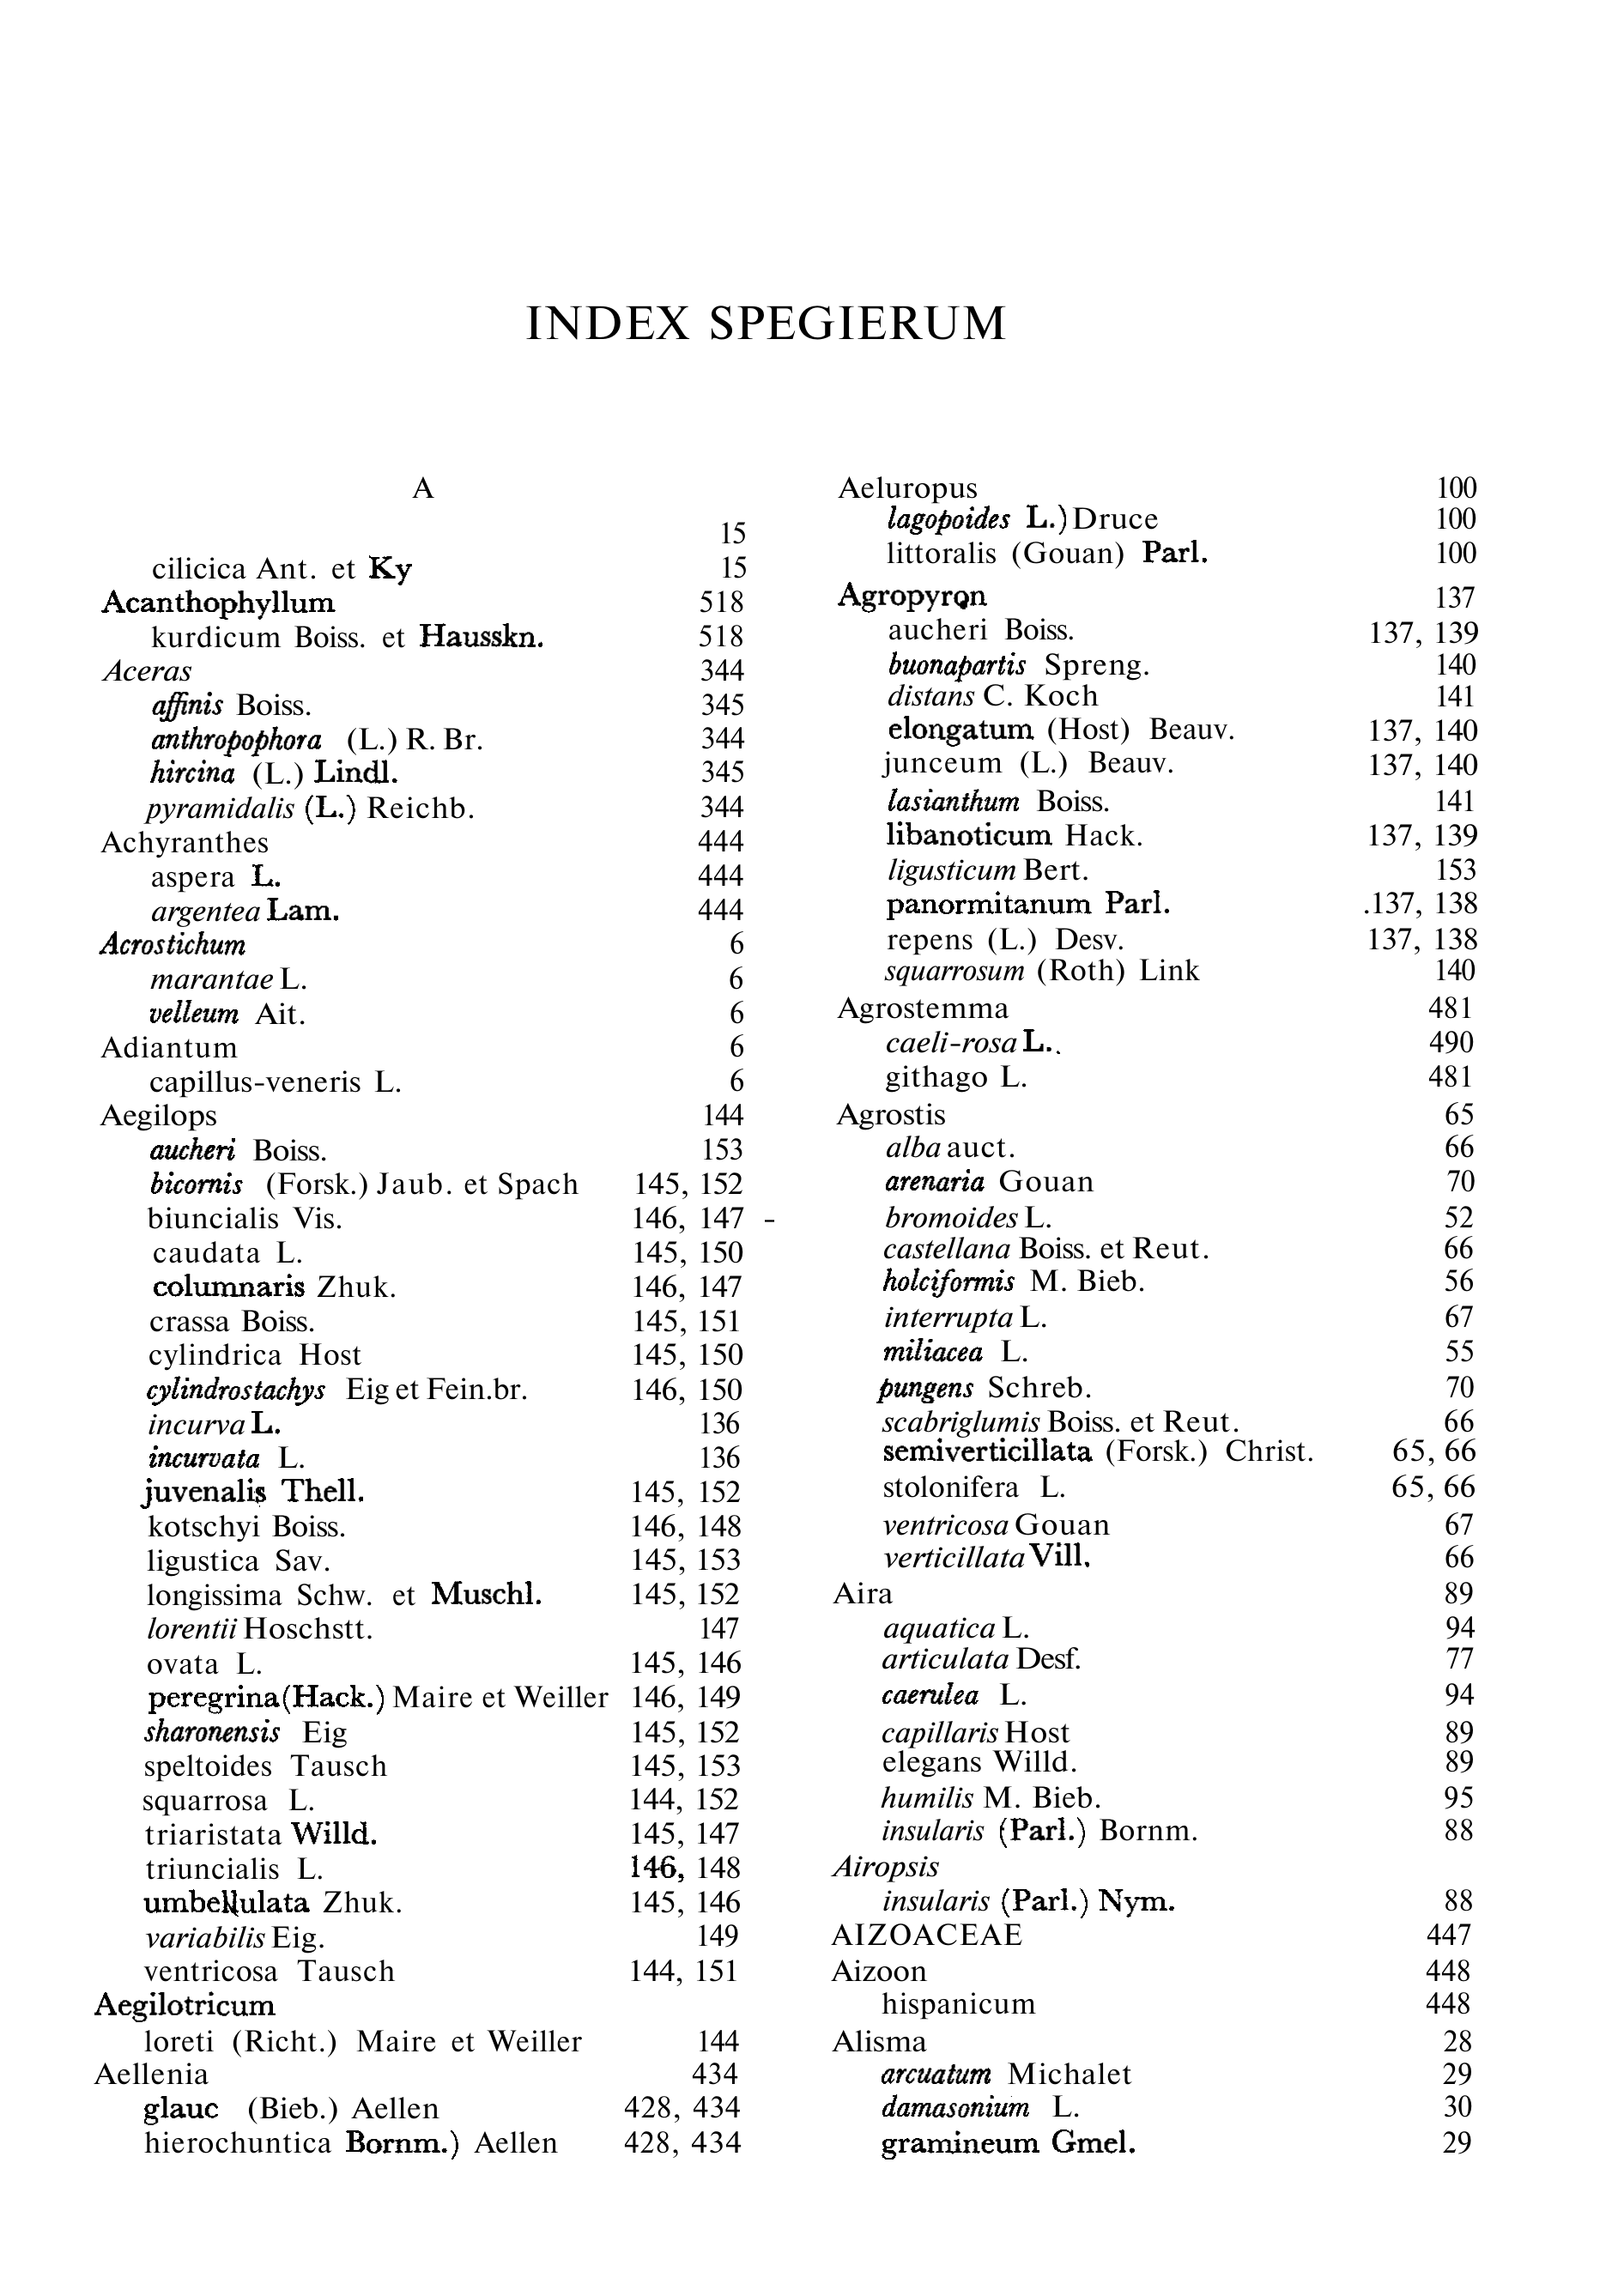

In [148]:
image

In [149]:
labels_unique

array([0, 1, 2])

In [150]:
blank_im = Image.new('RGB', image.size, (255, 255, 255))
blank_draw = ImageDraw.Draw(blank_im)
dy_block_lst = []
x0, y0, x1, y1 = 0, 0, 0, 0
myFont = ImageFont.truetype("Arial", 15)
g_i = 0
#block_lst = dict(block_lst)
i = 0
for b in block_lst:
    if b['type'] == 0:
        for l in b['lines']:
            #for s in l['spans']:
            #    for w in s['text']:
            prev_x0, prev_y0, prev_x1, prev_y1 = x0, y0, x1, y1
            x0, y0, x1, y1 = [coord*TARGET_DPI/ 72 for coord in l['bbox']]
            if x0 < 500:    
                draw.rectangle((x0, y0, x1, y1), fill=None, outline=ImageColor.getrgb("#222222"))
                draw.text((x0 - 5, y0 - 5), str(labels[i]), font=myFont, fill =(255, 0, 0))
                
                i += 1 

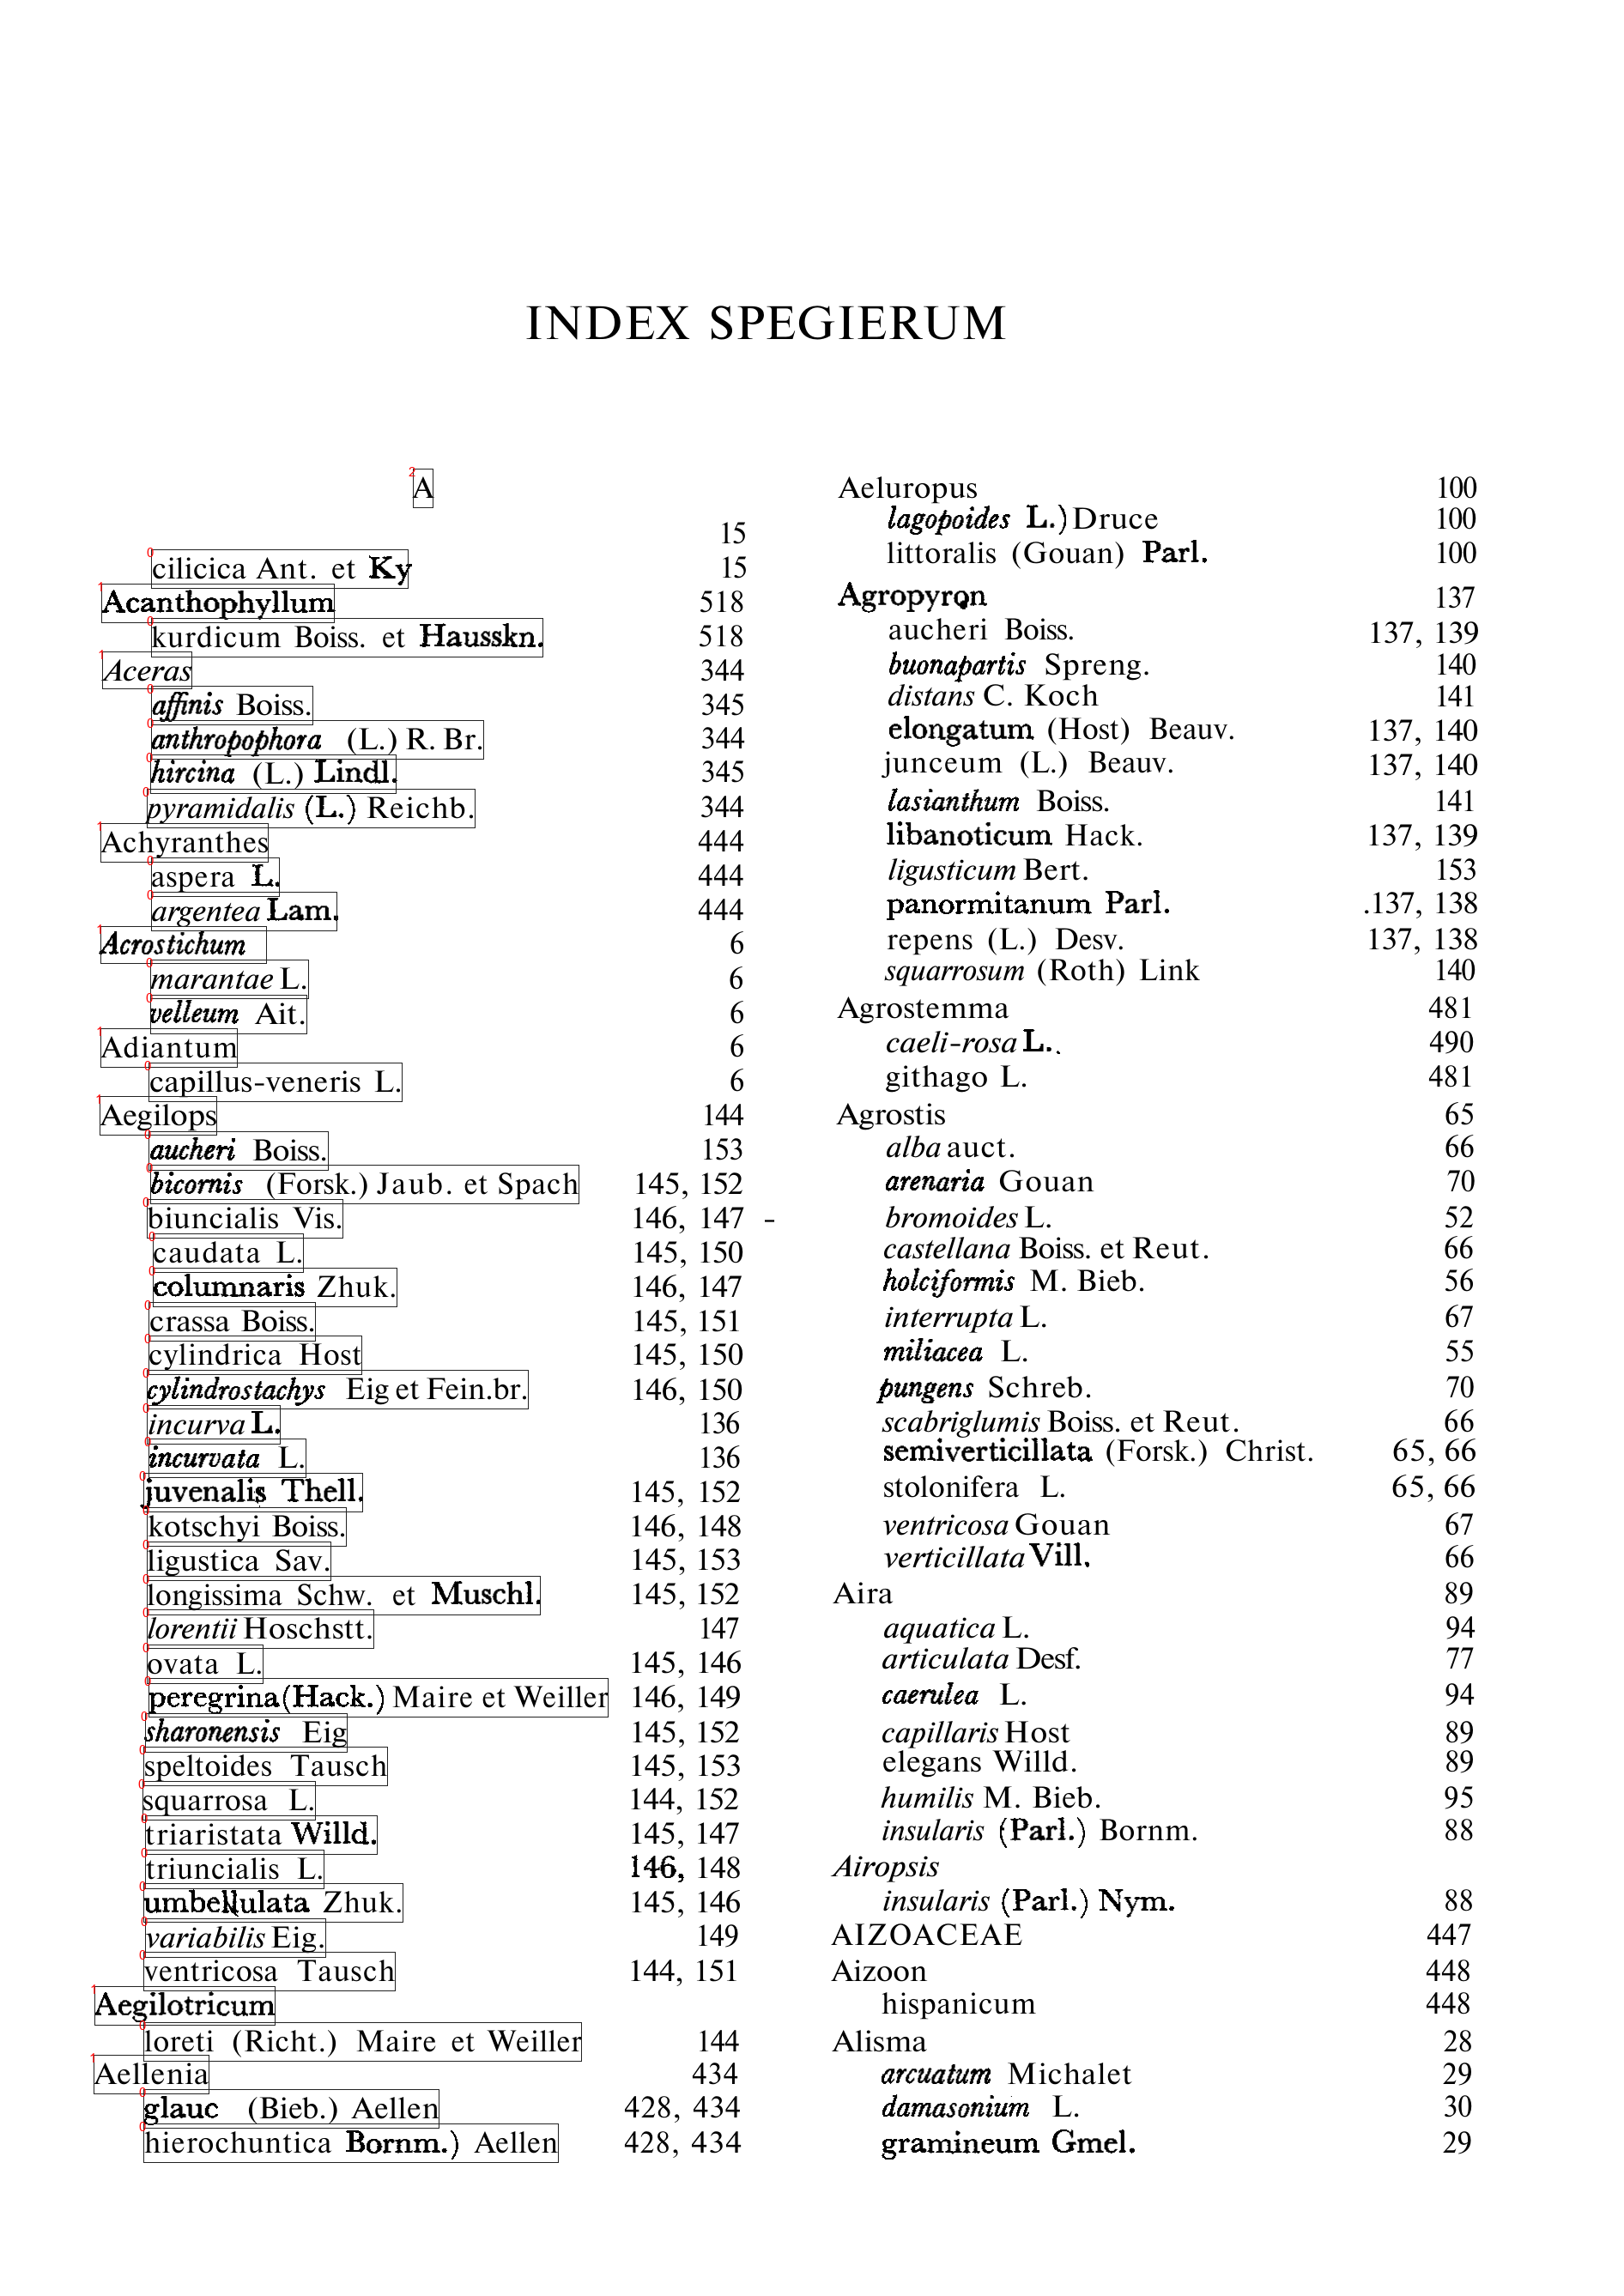

In [151]:
image

In [152]:
print(len(labels), len(line_x))

48 48


In [153]:
lines_labeled = zip(line_x.flatten(), labels)

In [154]:
cluster_centers.flatten()

array([172.15384744, 116.37499829, 481.00001017])

In [155]:
i = 0
for c in cluster_centers.flatten():
    draw.rectangle((c, 0, c+1, 2000), fill=None, outline=ImageColor.getrgb("#222222"))
    draw.text((c-10, 30), str(i), font=myFont, fill =(255, 0, 0))
    i += 1 

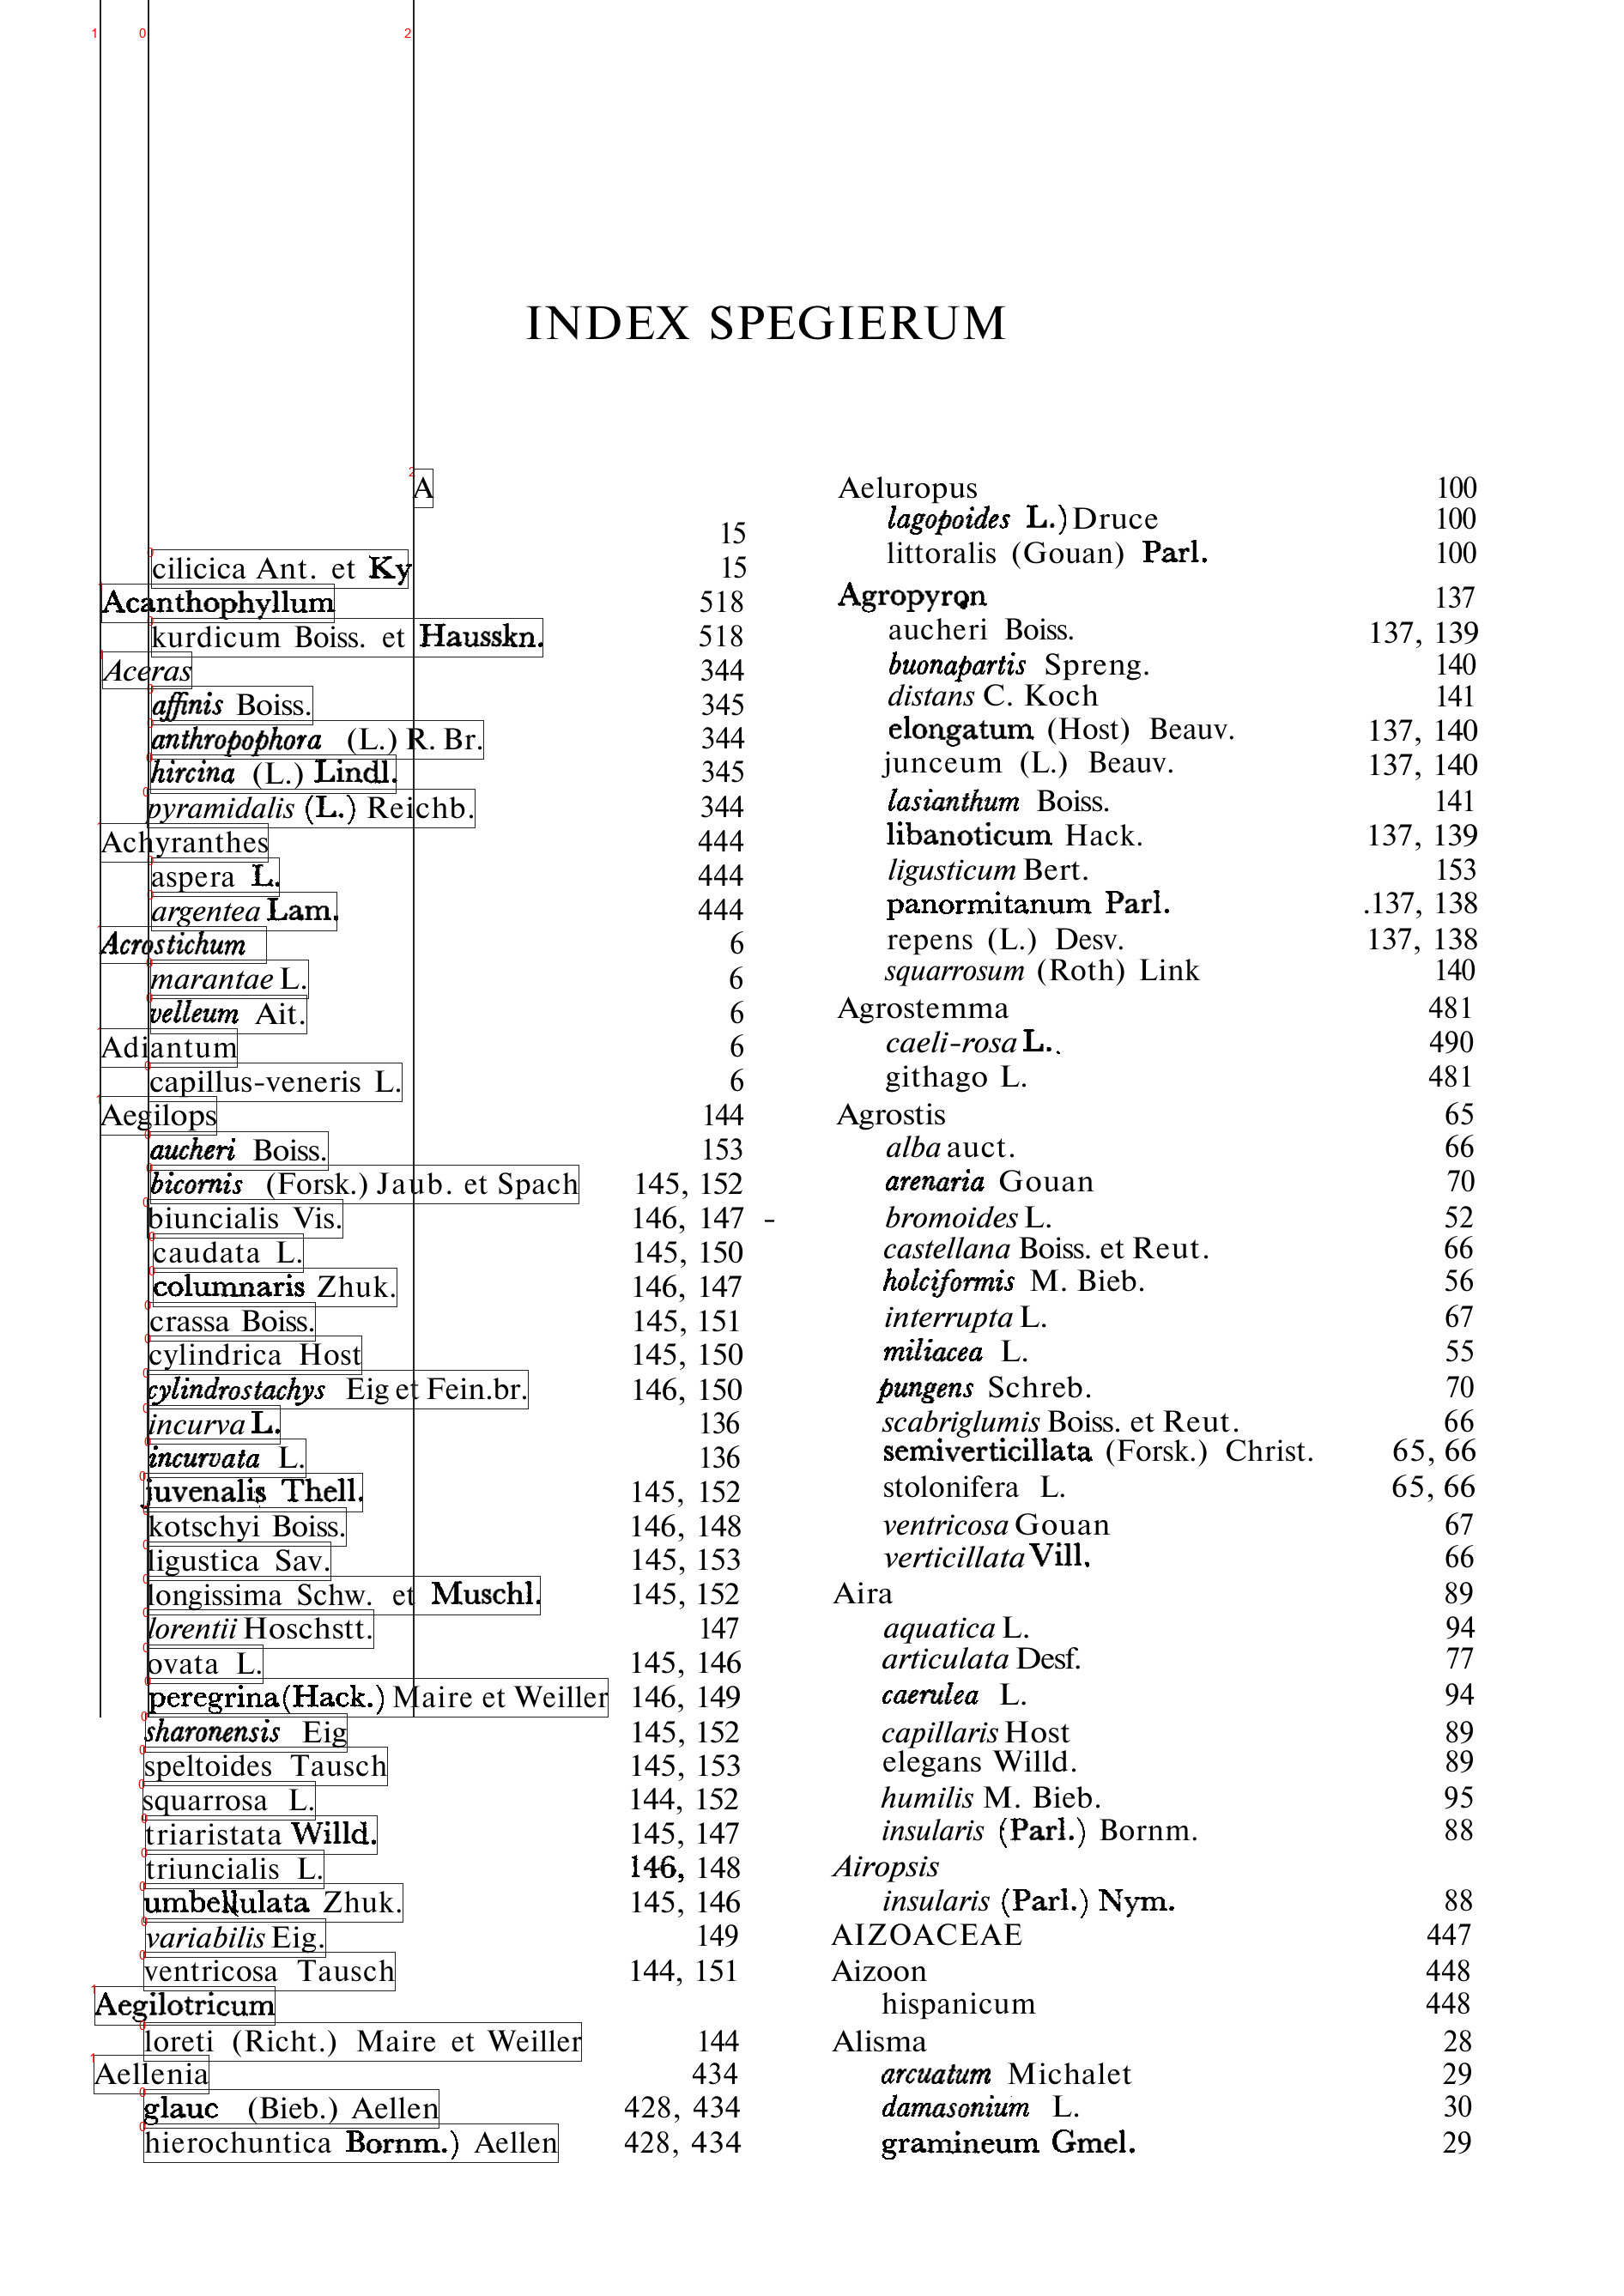

In [156]:
image

In [172]:
#next step: see if results are the same if we break it into 2 parts? 
#if still same see how we can find better ways to separate the x and y sides? Maybe a different algorithm? 
myFont = ImageFont.truetype("Arial", 15)

result_ims = []

for page_num in index:
    block_lst = pages[page_num].get_text("dict")['blocks']

    pix_map = doc.get_page_pixmap(page_num,matrix=mat)
    image = Image.open(io.BytesIO(pix_map.tobytes()))
    draw = ImageDraw.Draw(image)

    line_x = []
    for b in block_lst:
        if b['type'] == 0:
            for l in b['lines']:
                x0 = l['bbox'][0]*(TARGET_DPI/ 72)
                if x0 < 500:
                    line_x0 = x0
                    line_x.append(line_x0)
    line_x = np.array(line_x).reshape(-1, 1)


    bandwidth = max(estimate_bandwidth(line_x, quantile=0.25), 10) #basically setting 10 to our error now
    #with this bandwidth quantile have to do one per column (so will also need )

    ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
    print(bandwidth)
    ms.fit(line_x)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print(page_num, "number of estimated clusters : %d" % n_clusters_)


    blank_im = Image.new('RGB', image.size, (255, 255, 255))
    blank_draw = ImageDraw.Draw(blank_im)
    dy_block_lst = []
    x0, y0, x1, y1 = 0, 0, 0, 0
    myFont = ImageFont.truetype("Arial", 15)
    g_i = 0
    #block_lst = dict(block_lst)
    i = 0
    for b in block_lst:
        if b['type'] == 0:
            for l in b['lines']:
                #for s in l['spans']:
                #    for w in s['text']:
                prev_x0, prev_y0, prev_x1, prev_y1 = x0, y0, x1, y1
                x0, y0, x1, y1 = [coord*TARGET_DPI/ 72 for coord in l['bbox']]
                if x0 < 500:
                
                    draw.rectangle((x0, y0, x1, y1), fill=None, outline=ImageColor.getrgb("#222222"))
                    draw.text((x0 - 5, y0 - 5), str(labels[i]), font=myFont, fill =(255, 0, 0))
                    
                    i += 1 

    i = 0
    for c in cluster_centers.flatten():
        draw.rectangle((c, 0, c+1, 2000), fill=None, outline=ImageColor.getrgb("#222222"))
        draw.text((c-10, 30), str(i), font=myFont, fill =(255, 0, 0))
        i += 1 
    result_ims.append(image)

result_ims[0].save('../output/index/PDF/x_cluster_index.pdf',save_all=True, append_images=result_ims[1:])


16.66666583882438
616 number of estimated clusters : 3
10
617 number of estimated clusters : 3
10.03448469885465
618 number of estimated clusters : 2
10.966103763903613
619 number of estimated clusters : 2
22.60344727285977
620 number of estimated clusters : 3
11.122808121798334
621 number of estimated clusters : 2
10.275865971356966
622 number of estimated clusters : 2
10
623 number of estimated clusters : 2
10
624 number of estimated clusters : 3
14.65517350997048
625 number of estimated clusters : 3
10
626 number of estimated clusters : 4
10
627 number of estimated clusters : 2
10
628 number of estimated clusters : 3
21.33552024238987
629 number of estimated clusters : 4
10
630 number of estimated clusters : 2
10
631 number of estimated clusters : 3
10
632 number of estimated clusters : 2
12.370369758135011
633 number of estimated clusters : 3
10
634 number of estimated clusters : 2
12.322034808875483
635 number of estimated clusters : 2
10
636 number of estimated clusters : 4
10.45

In [165]:
bandwidth

200